In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tqdm import tqdm

In [2]:
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')

In [3]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(52/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    rets.iloc[0] = 0
    sharpe = np.sqrt(52) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [4]:
sp500 = 'MMM AOS ABT ABBV ACN ADM ADBE ADP AES AFL A ABNB APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BX BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE COR CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM HPQ HUBB HUM HBAN HII IBM IEX IDXX ITW ILMN INCY IR PODD INTC ICE IFF IP IPG INTU ISRG IVZ INVH IQV IRM JBHT JKHY J JNJ JCI JPM JNPR K KVUE KDP KEY KEYS KMB KIM KMI KLAC KHC KR LHX LH LRCX LW LVS LDOS LEN LIN LYV LKQ LMT L LOW LULU LYB MTB MRO MPC MKTX MAR MMC MLM MAS MA MTCH MKC MCD MCK MDT MRK META MET MTD MGM MCHP MU MSFT MAA MRNA MHK MOH TAP MDLZ MPWR MNST MCO MS MOS MSI MSCI NDAQ NTAP NFLX NEM NWSA NWS NEE NKE NI NDSN NSC NTRS NOC NCLH NRG NUE NVDA NVR NXPI ORLY OXY ODFL OMC ON OKE ORCL OTIS PCAR PKG PANW PARA PH PAYX PAYC PYPL PNR PEP PFE PCG PM PSX PNW PXD PNC POOL PPG PPL PFG PG PGR PLD PRU PEG PTC PSA PHM QRVO PWR QCOM DGX RL RJF RTX O REG REGN RF RSG RMD RVTY RHI ROK ROL ROP ROST RCL SPGI CRM SBAC SLB STX SEE SRE NOW SHW SPG SWKS SJM SNA SEDG SO LUV SWK SBUX STT STLD STE SYK SYF SNPS SYY TMUS TROW TTWO TPR TRGP TGT TEL TDY TFX TER TSLA TXN TXT TMO TJX TSCO TT TDG TRV TRMB TFC TYL TSN USB UDR ULTA UNP UAL UPS URI UNH UHS VLO VTR VLTO VRSN VRSK VZ VRTX VFC VTRS VICI V VMC WAB WBA WMT WBD WM WAT WEC WFC WELL WST WDC WRK WY WHR WMB WTW GWW WYNN XEL XYL YUM ZBRA ZBH ZION ZTS'
sp500 = sp500.split()

In [5]:
start = '2018-01-01'
end = '2022-12-31'

In [6]:
'''
tmpdf = yf.download(sp500[0], start=start, end=end)
prices = pd.DataFrame(index=tmpdf.index, columns=sp500)
prices
'''

'\ntmpdf = yf.download(sp500[0], start=start, end=end)\nprices = pd.DataFrame(index=tmpdf.index, columns=sp500)\nprices\n'

In [7]:
'''
for stock in sp500:
    tmpdf = yf.download(stock, start=start, end=end)
    prices[stock] = tmpdf['Adj Close']
'''

"\nfor stock in sp500:\n    tmpdf = yf.download(stock, start=start, end=end)\n    prices[stock] = tmpdf['Adj Close']\n"

In [8]:
#prices = prices.dropna(axis=1)
#prices.to_csv('sp500.csv')

In [9]:
prices = pd.read_csv('sp500.csv', index_col=0)
prices

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,187.720306,55.305794,53.086948,74.990395,140.888641,34.065536,177.699997,102.311691,8.989430,38.075150,...,135.288345,214.575867,153.529205,40.135136,63.285545,73.298294,103.709999,114.987968,42.113949,68.963196
2018-01-03,187.712326,55.638367,53.204346,76.163879,141.538864,33.802120,181.039993,103.423119,8.981167,38.187691,...,137.819397,213.228500,151.865891,39.866508,64.057205,73.235397,105.769997,115.785088,42.064102,69.280296
2018-01-04,190.166000,55.899021,53.114044,75.729546,143.214798,34.371445,183.220001,104.411026,8.948118,38.581547,...,139.218384,214.894455,152.688202,39.555897,64.484894,73.980965,107.860001,115.618217,42.238537,69.693459
2018-01-05,191.647705,56.618111,53.267563,77.047829,144.396194,34.142025,185.339996,104.349297,8.981167,38.836910,...,140.111176,216.888077,153.706757,39.278881,64.364029,74.412117,109.540001,116.767563,42.255165,70.491020
2018-01-08,191.026337,56.887764,53.114044,75.813362,145.550110,34.065536,185.039993,104.031738,8.981167,38.936451,...,139.356445,216.888077,151.660309,39.572689,64.596436,74.537895,110.629997,116.990013,42.047497,71.336594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,113.290985,55.871151,106.058311,156.766922,261.928528,92.479233,338.450012,235.585587,27.770979,70.109039,...,240.837219,559.257568,80.091263,68.115936,108.321205,126.519447,248.220001,125.714478,46.140095,144.442413
2022-12-27,113.366432,56.627228,106.440659,156.661209,261.160736,93.740044,335.089996,235.673584,27.906540,70.587845,...,241.024475,559.485291,83.673149,68.730545,109.298492,127.500969,251.000000,126.299927,46.511501,143.986588
2022-12-28,111.546455,55.743504,105.715179,155.930695,259.004974,91.501854,328.329987,232.564270,27.422386,69.835449,...,238.225769,551.300720,79.466171,68.235489,107.541344,126.921883,246.839996,125.019859,45.682983,142.529861


In [10]:
returns = prices.pct_change().dropna()

# Analyze eigenvalue distribution

In [11]:
# generate random samples of uncorrelated random variables 

# set parameters
mean = returns.mean()
cov = np.diag(returns.var()) # off-diagonal elements = 0 => no correlation

evalues_rs = []

# generate 100 samples and save eigenvalues of correlation matrix
for _ in tqdm(range(100)):
    rs = np.random.multivariate_normal(mean=mean, cov=cov, size=len(returns))
    evls = np.linalg.eigh(np.corrcoef(rs.T))[0]
    evalues_rs.extend(list(evls))

100%|██████████| 100/100 [00:08<00:00, 11.68it/s]


### Find analytical distribution of eigenvalues for random correlation matrix

In [12]:
Q = returns.shape[0] / returns.shape[1]
Q

2.5673469387755103

In [13]:
lambda_plus = 1 + 1/Q + 2*np.sqrt(1/Q)
lambda_plus

2.6377173195506476

In [14]:
lambda_minus = 1 + 1/Q - 2*np.sqrt(1/Q)
lambda_minus

0.14129698887542563

In [15]:
# probability distribution
ls = np.linspace(lambda_minus, lambda_plus)
P_rm = [Q / (2*np.pi) * np.sqrt((lambda_plus - x) * (x - lambda_minus)) / x for x in ls]

Text(0, 0.5, 'frequency')

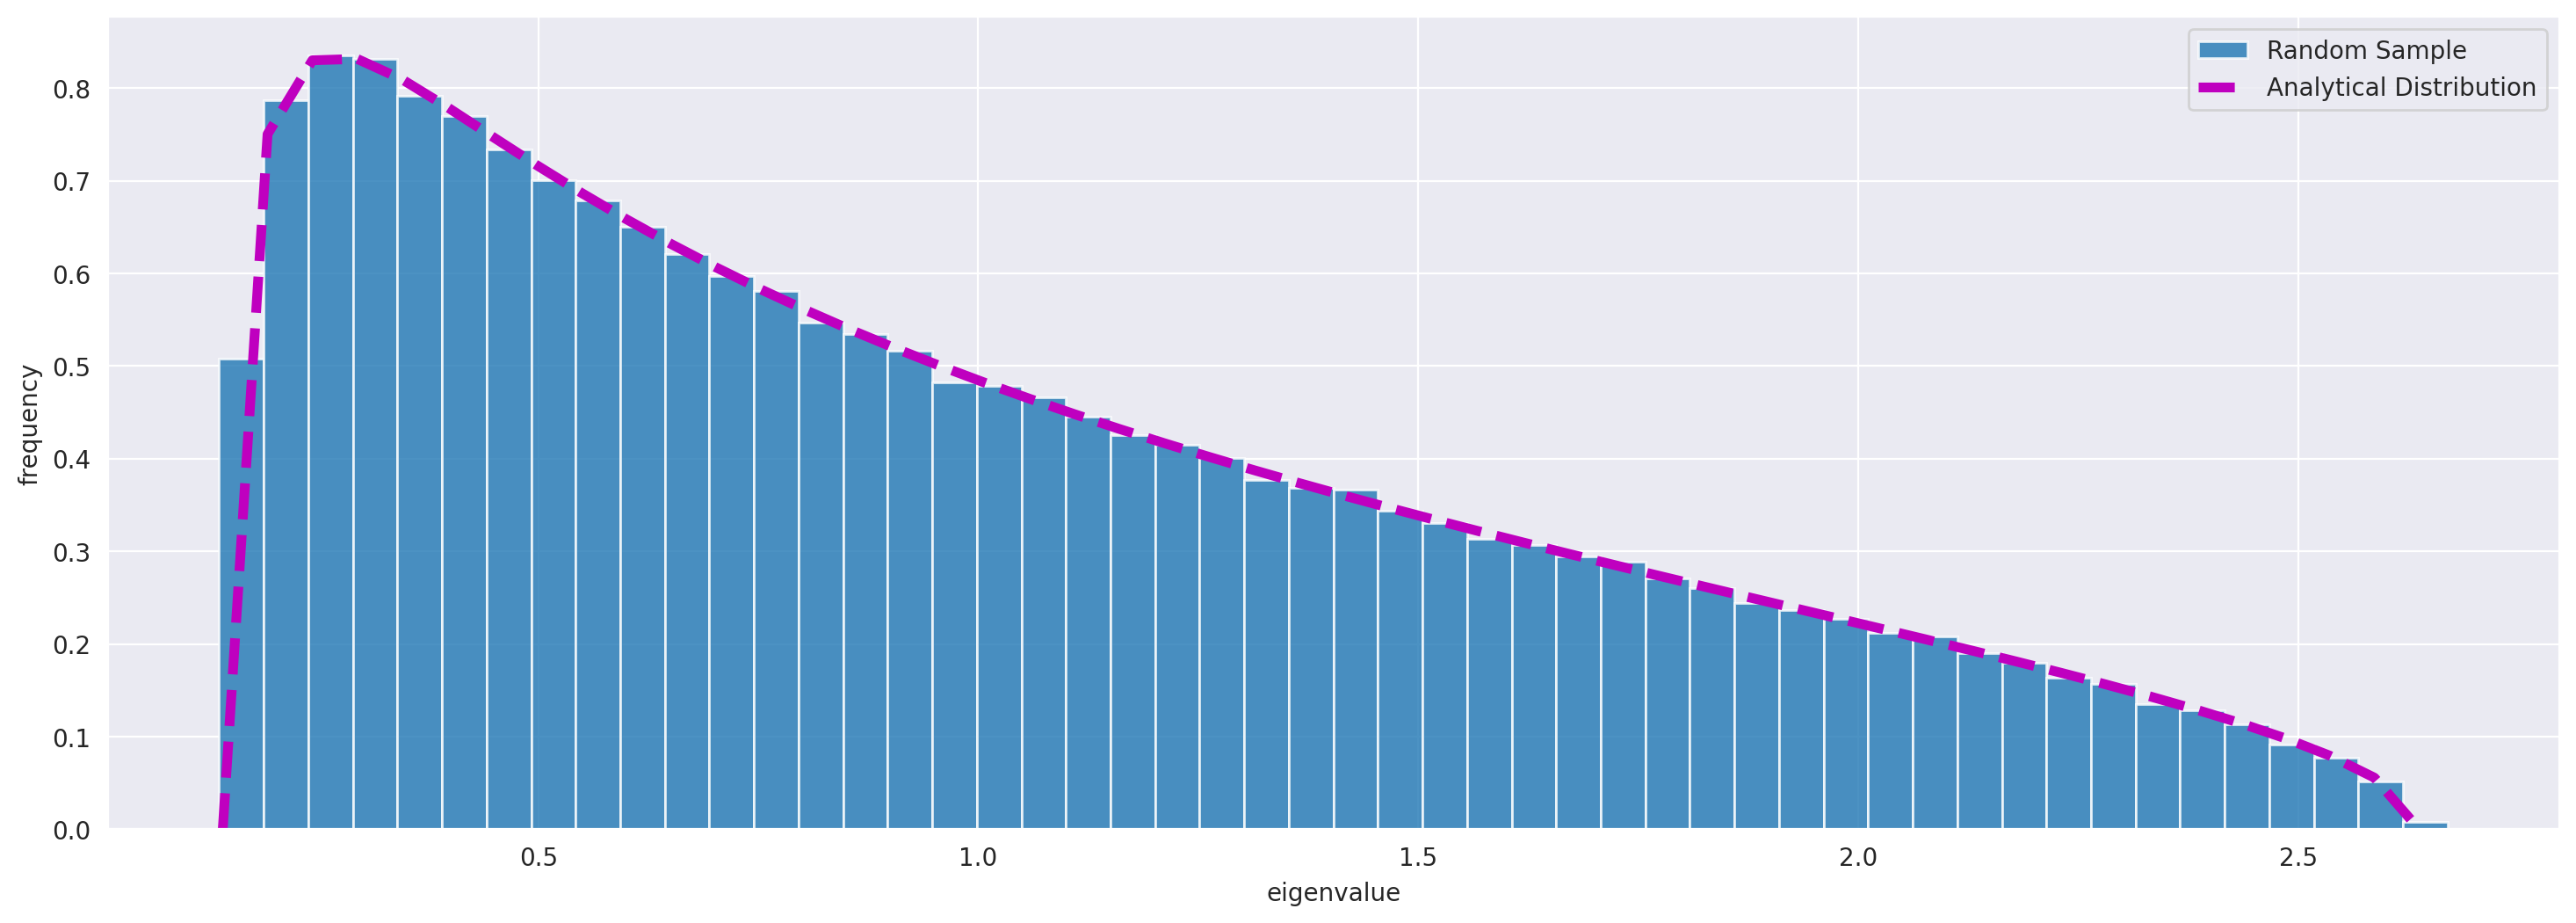

In [16]:
# eigenvalues of uncorrelated random samples vs. analytical distribution
plt.figure(figsize=(18,6))
plt.hist(evalues_rs, density=True, bins=50, alpha=0.8, label='Random Sample')
plt.plot(ls, P_rm, color='m', linewidth=4, linestyle='dashed', label='Analytical Distribution')
plt.legend()
plt.xlabel('eigenvalue')
plt.ylabel('frequency')

In [17]:
# eigenvalues of real correlation matrix
corr = returns.corr()
evalues = np.linalg.eigh(corr)[0]

In [18]:
# number of eigenvalues larger than lambda+
len(evalues[evalues>lambda_plus])

15

In [19]:
# # number of eigenvalues smaller than lambda-
len(evalues[evalues<lambda_minus])

173

Text(0, 0.5, 'frequency')

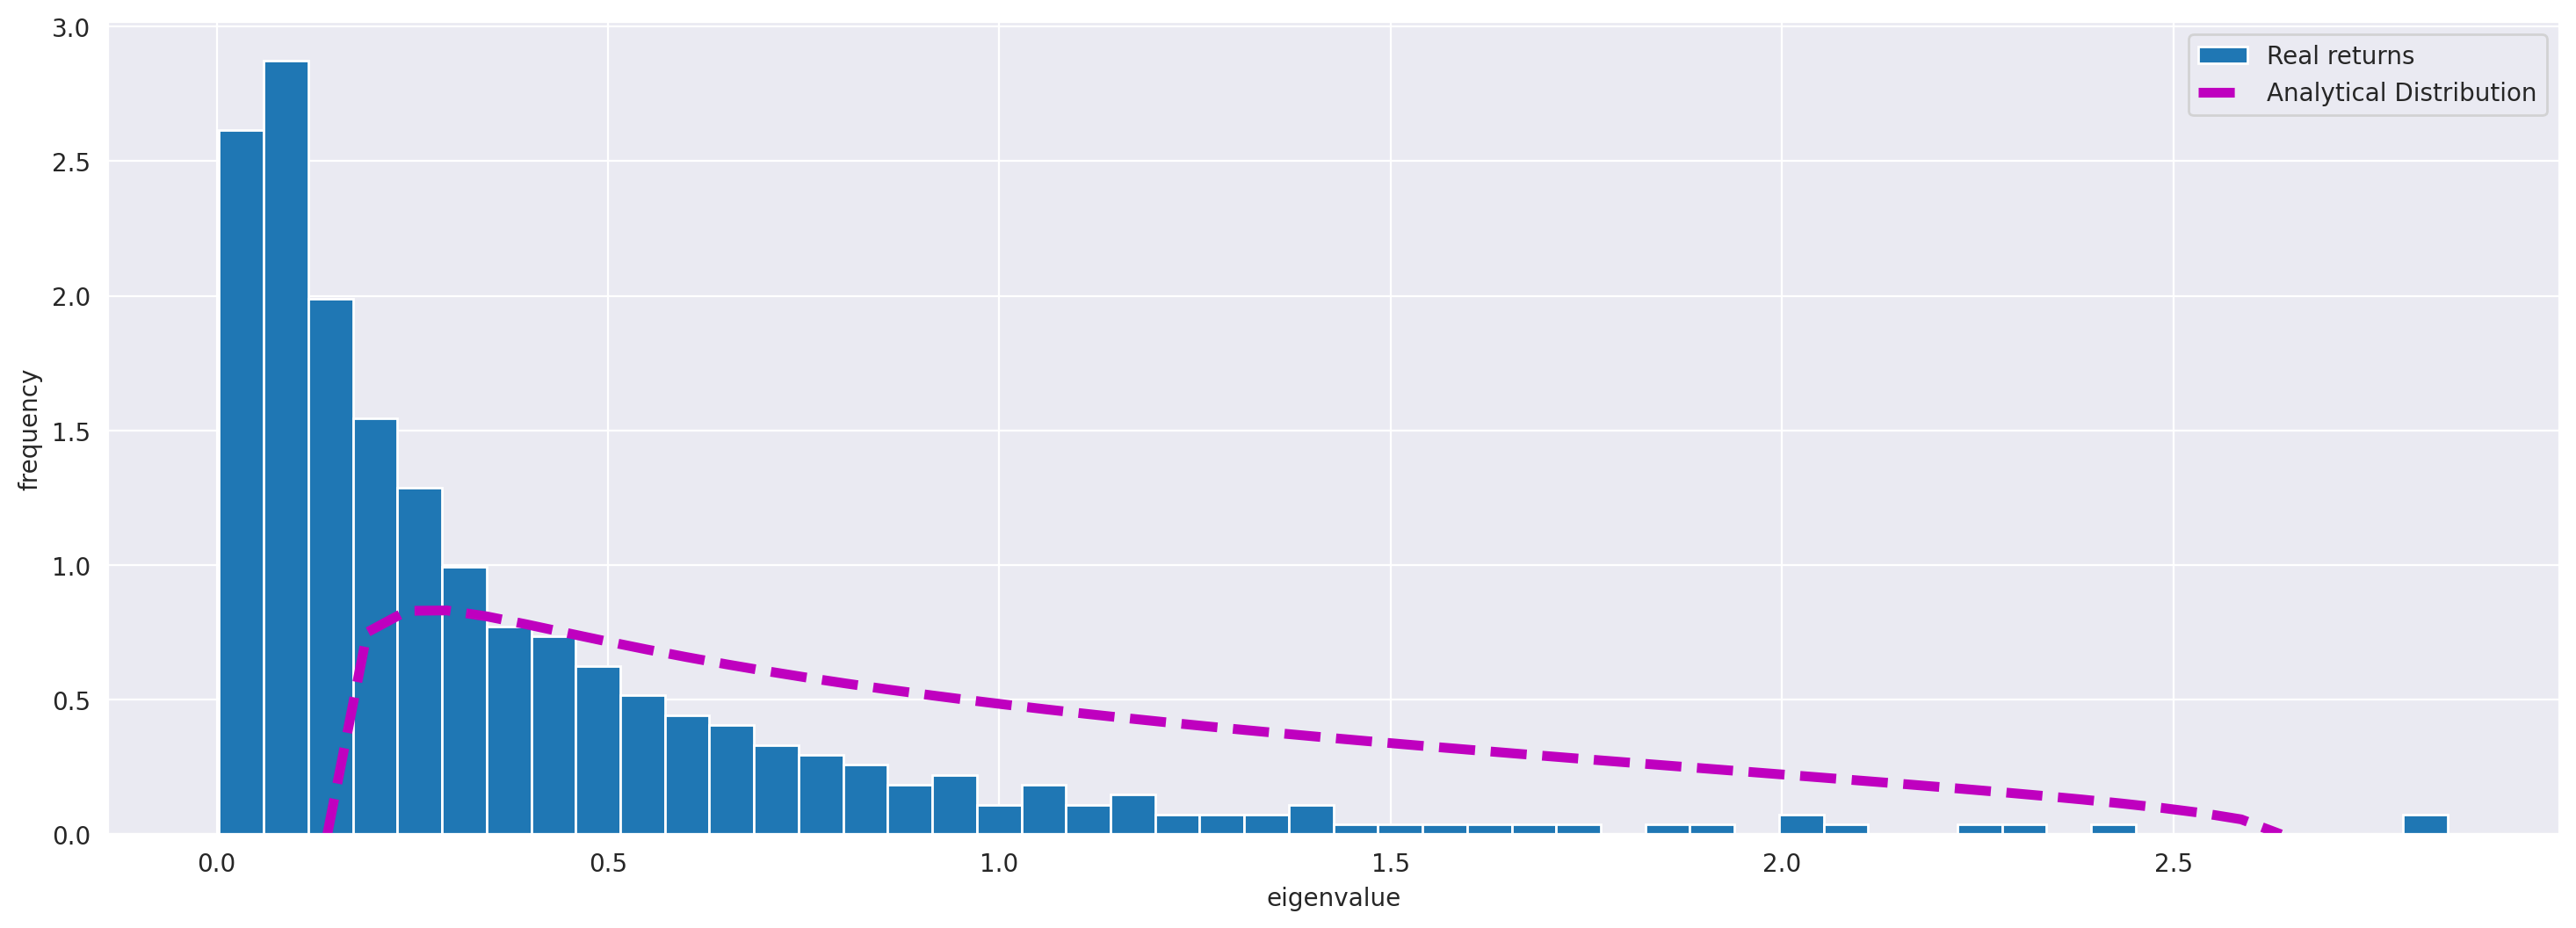

In [20]:
# eigenvalues of real returns vs analytical distribution (eigenvalues<=3)
plt.figure(figsize=(18,6))
plt.hist(evalues[evalues<=3], density=True, bins=50, label='Real returns')
plt.plot(ls, P_rm, color='m', linewidth=4, linestyle='dashed', label='Analytical Distribution')
plt.legend()
plt.xlabel('eigenvalue')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

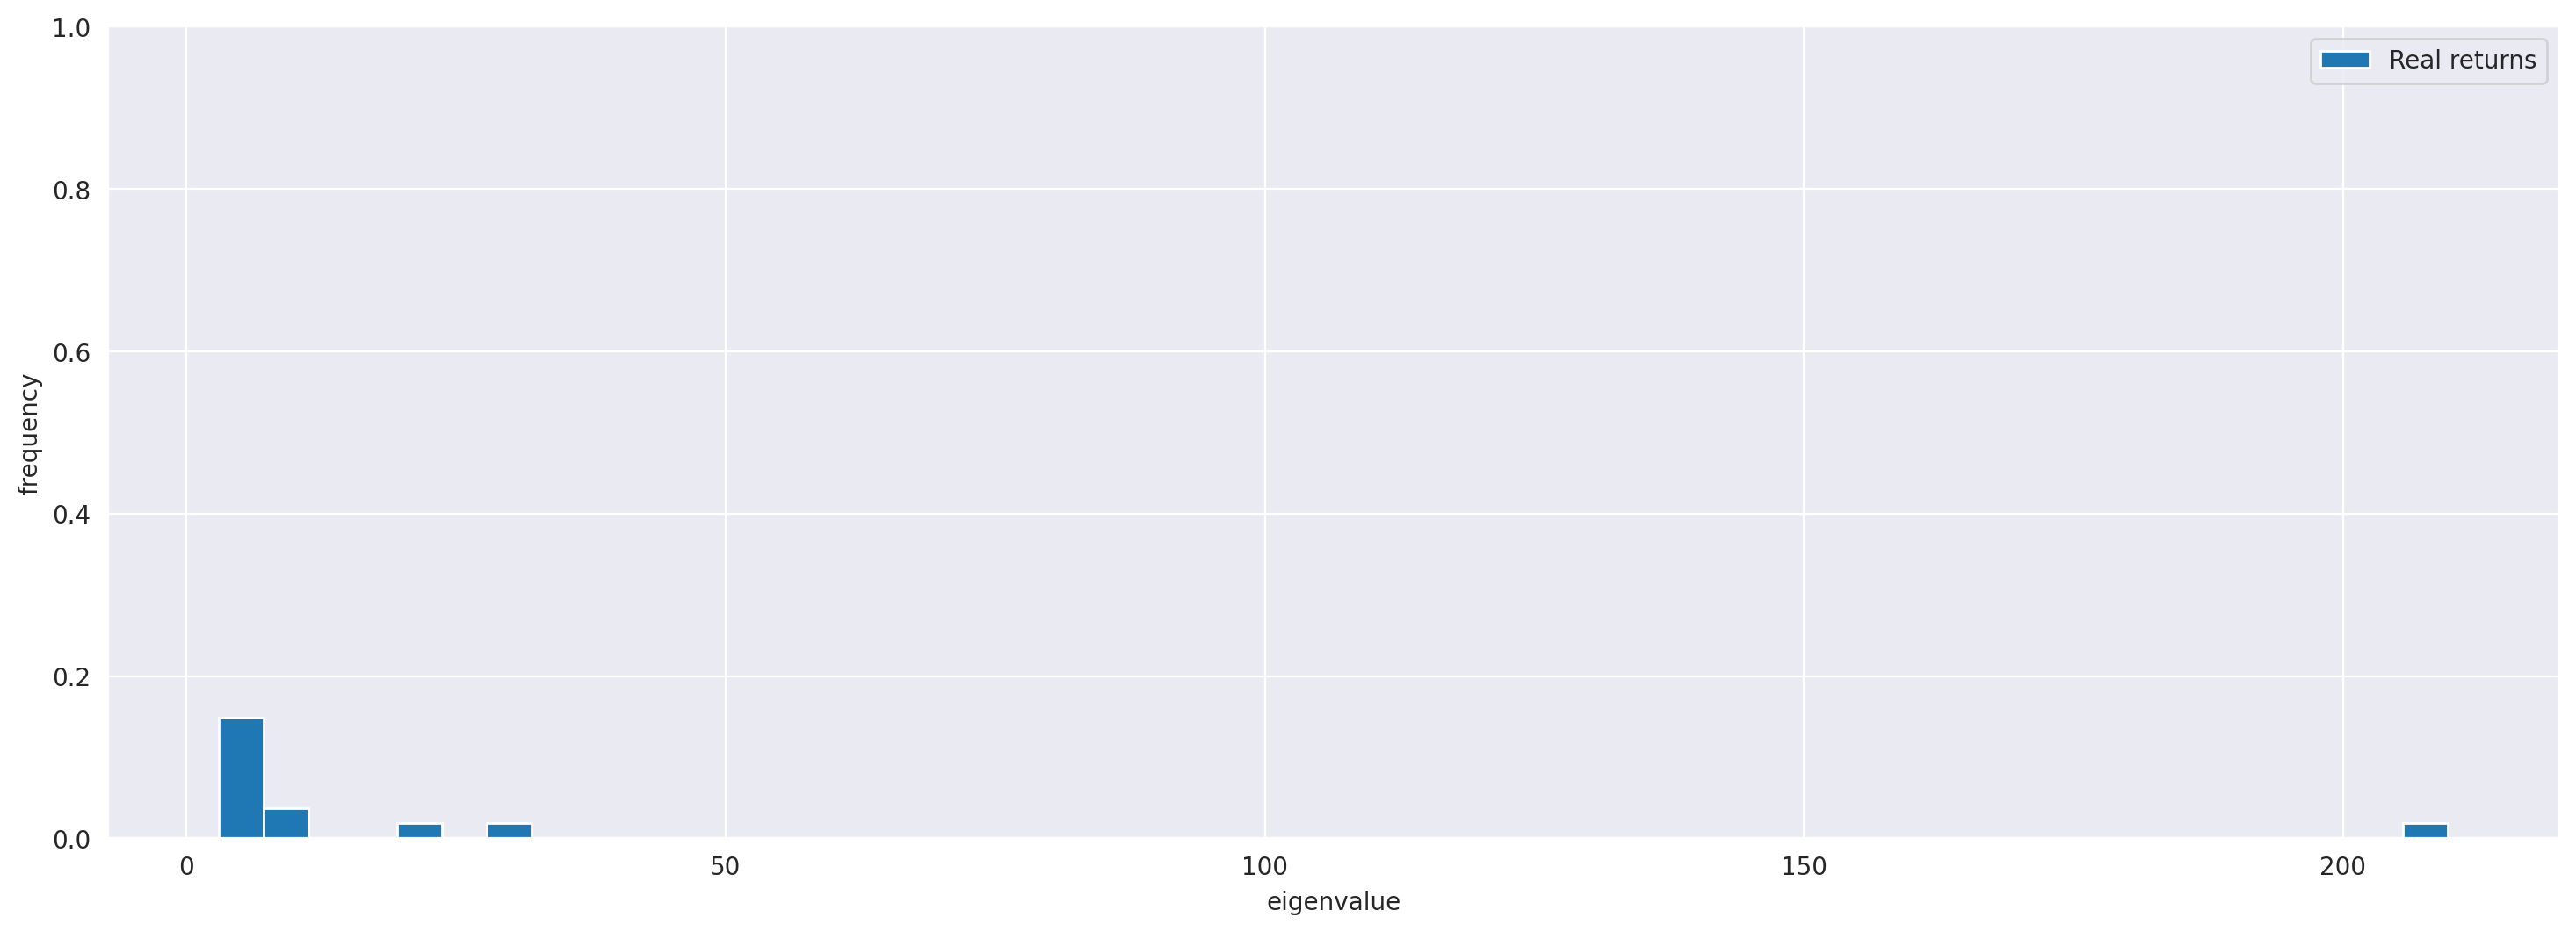

In [21]:
# eigenvalues of real returns vs analytical distribution (eigenvalues>3)
plt.figure(figsize=(18,6))
plt.hist(evalues[evalues>3], density=True, bins=50, label='Real returns')
plt.ylim(0,1.0)
plt.legend()
plt.xlabel('eigenvalue')
plt.ylabel('frequency')

# Distribution of eigenvector components

In [22]:
evalues,evectors = np.linalg.eigh(returns.corr())

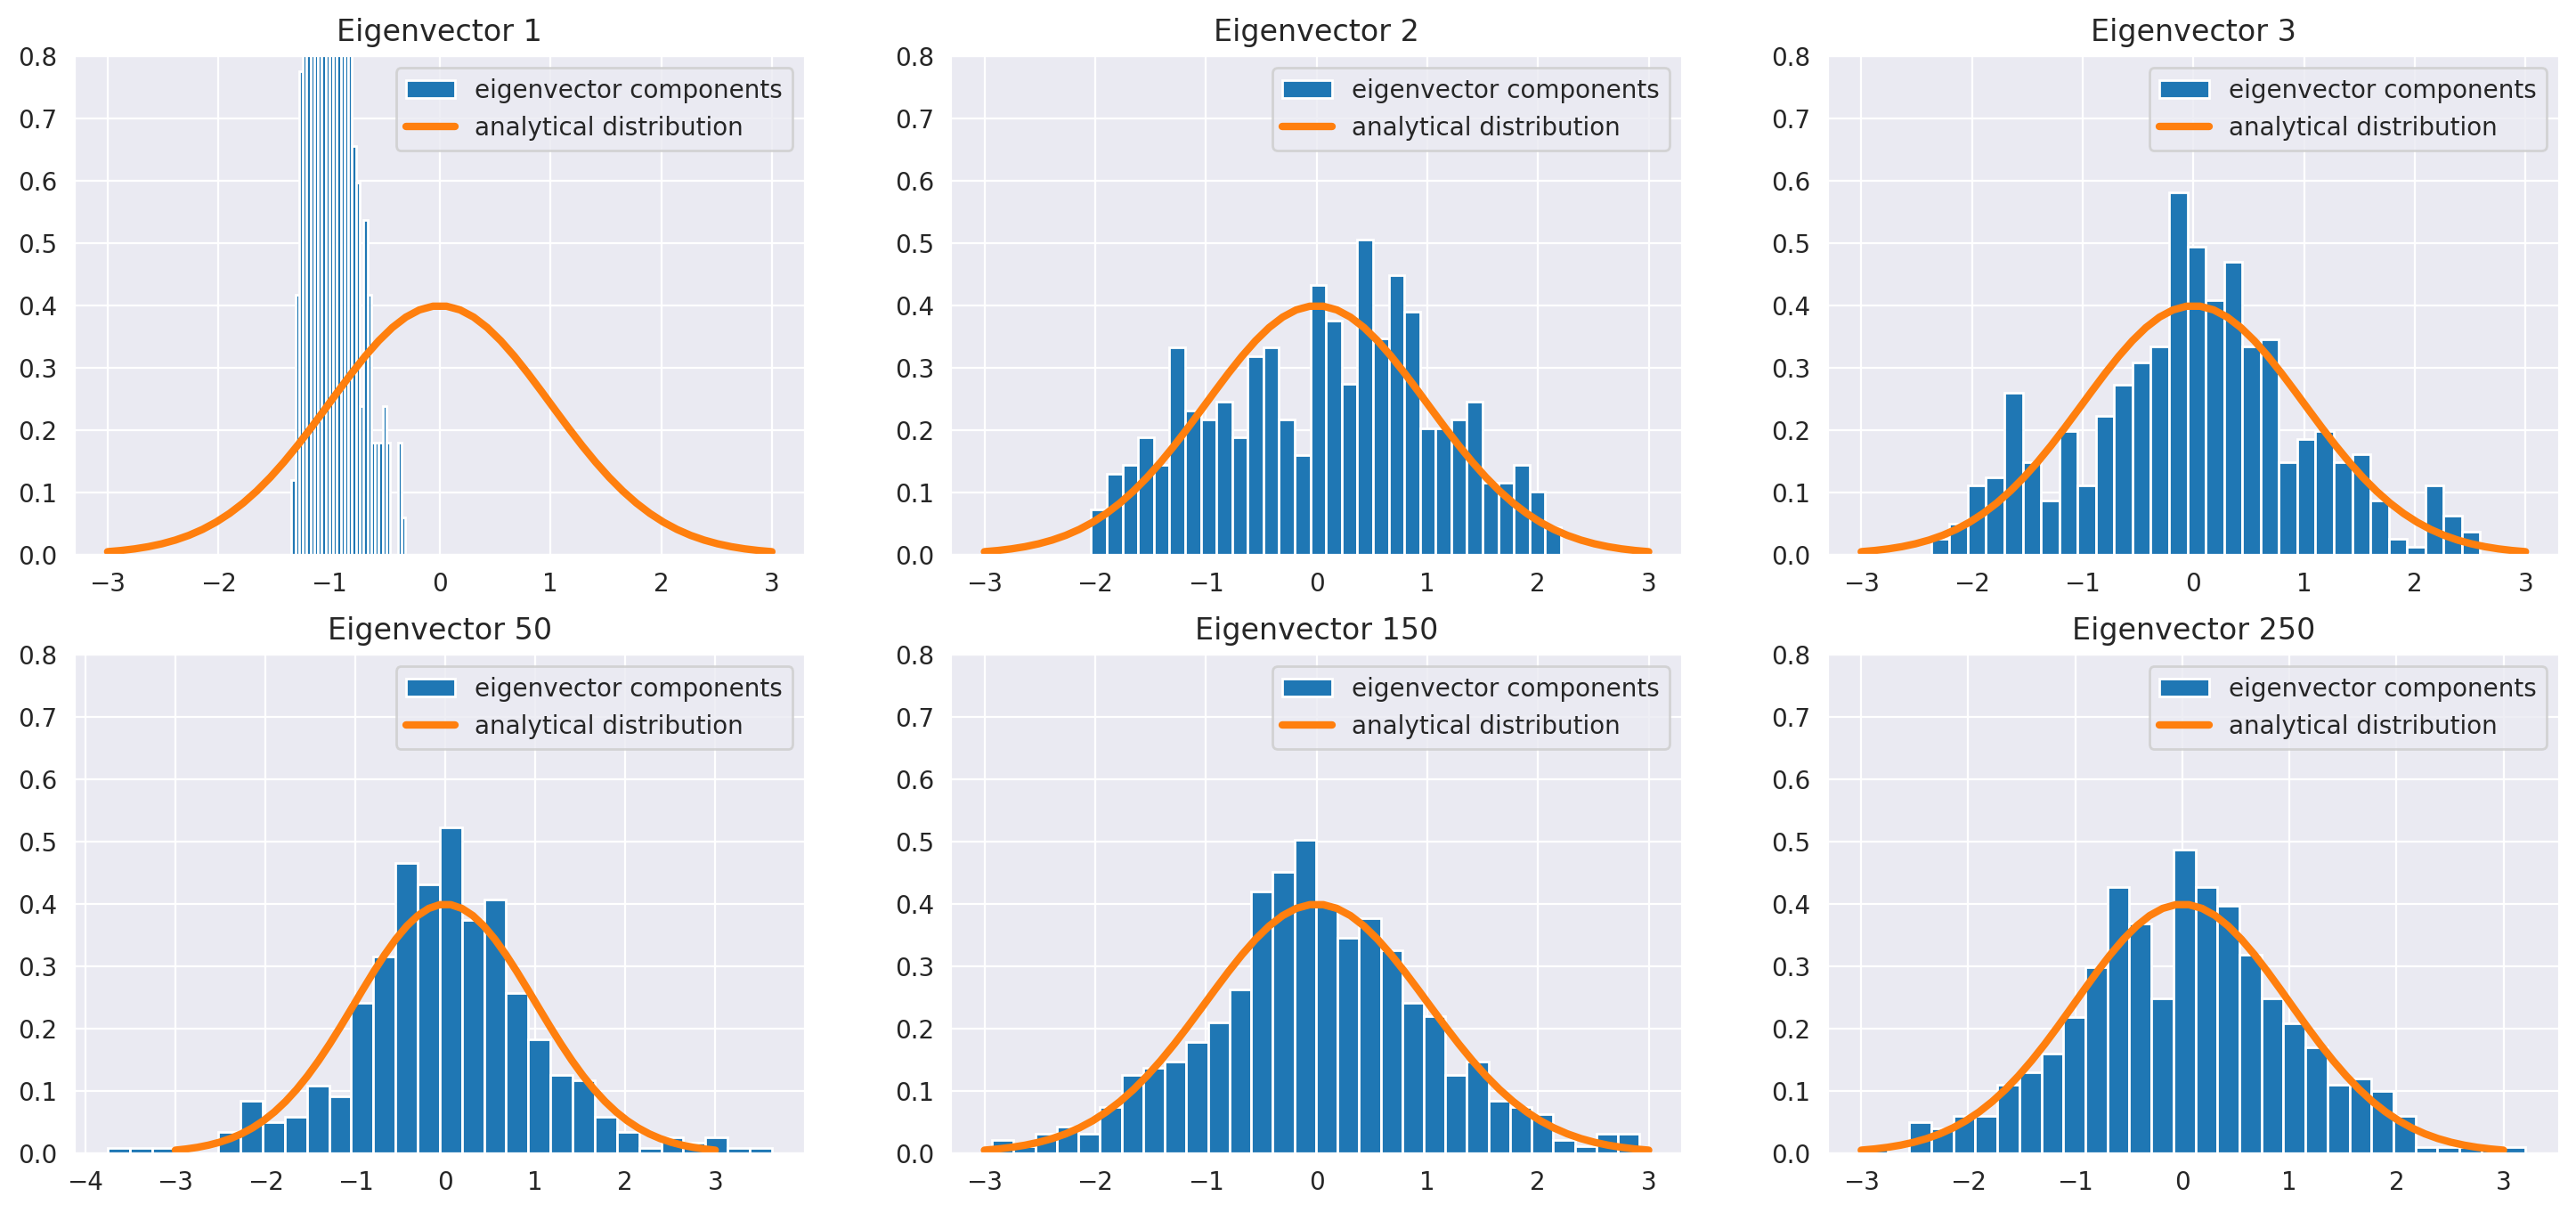

In [23]:
comps = [-1,-2,-3,-50,-150,-250] # indexes of eigenvectors to plot

fig, axs = plt.subplots(2,3, figsize=(18,8))

for ax,i in zip(axs.flatten(),comps):
    components = evectors[:,i] / np.sqrt(1/len(evalues))
    ls = np.linspace(-3,3)
    ax.hist(components, density=True, bins=30, label='eigenvector components')
    ax.plot(ls, 1/np.sqrt(2*np.pi) * np.exp(-ls**2/2), linewidth=3, label='analytical distribution')
    ax.set_ylim(0,0.8)
    ax.set_title(f'Eigenvector {-i}')
    ax.legend()

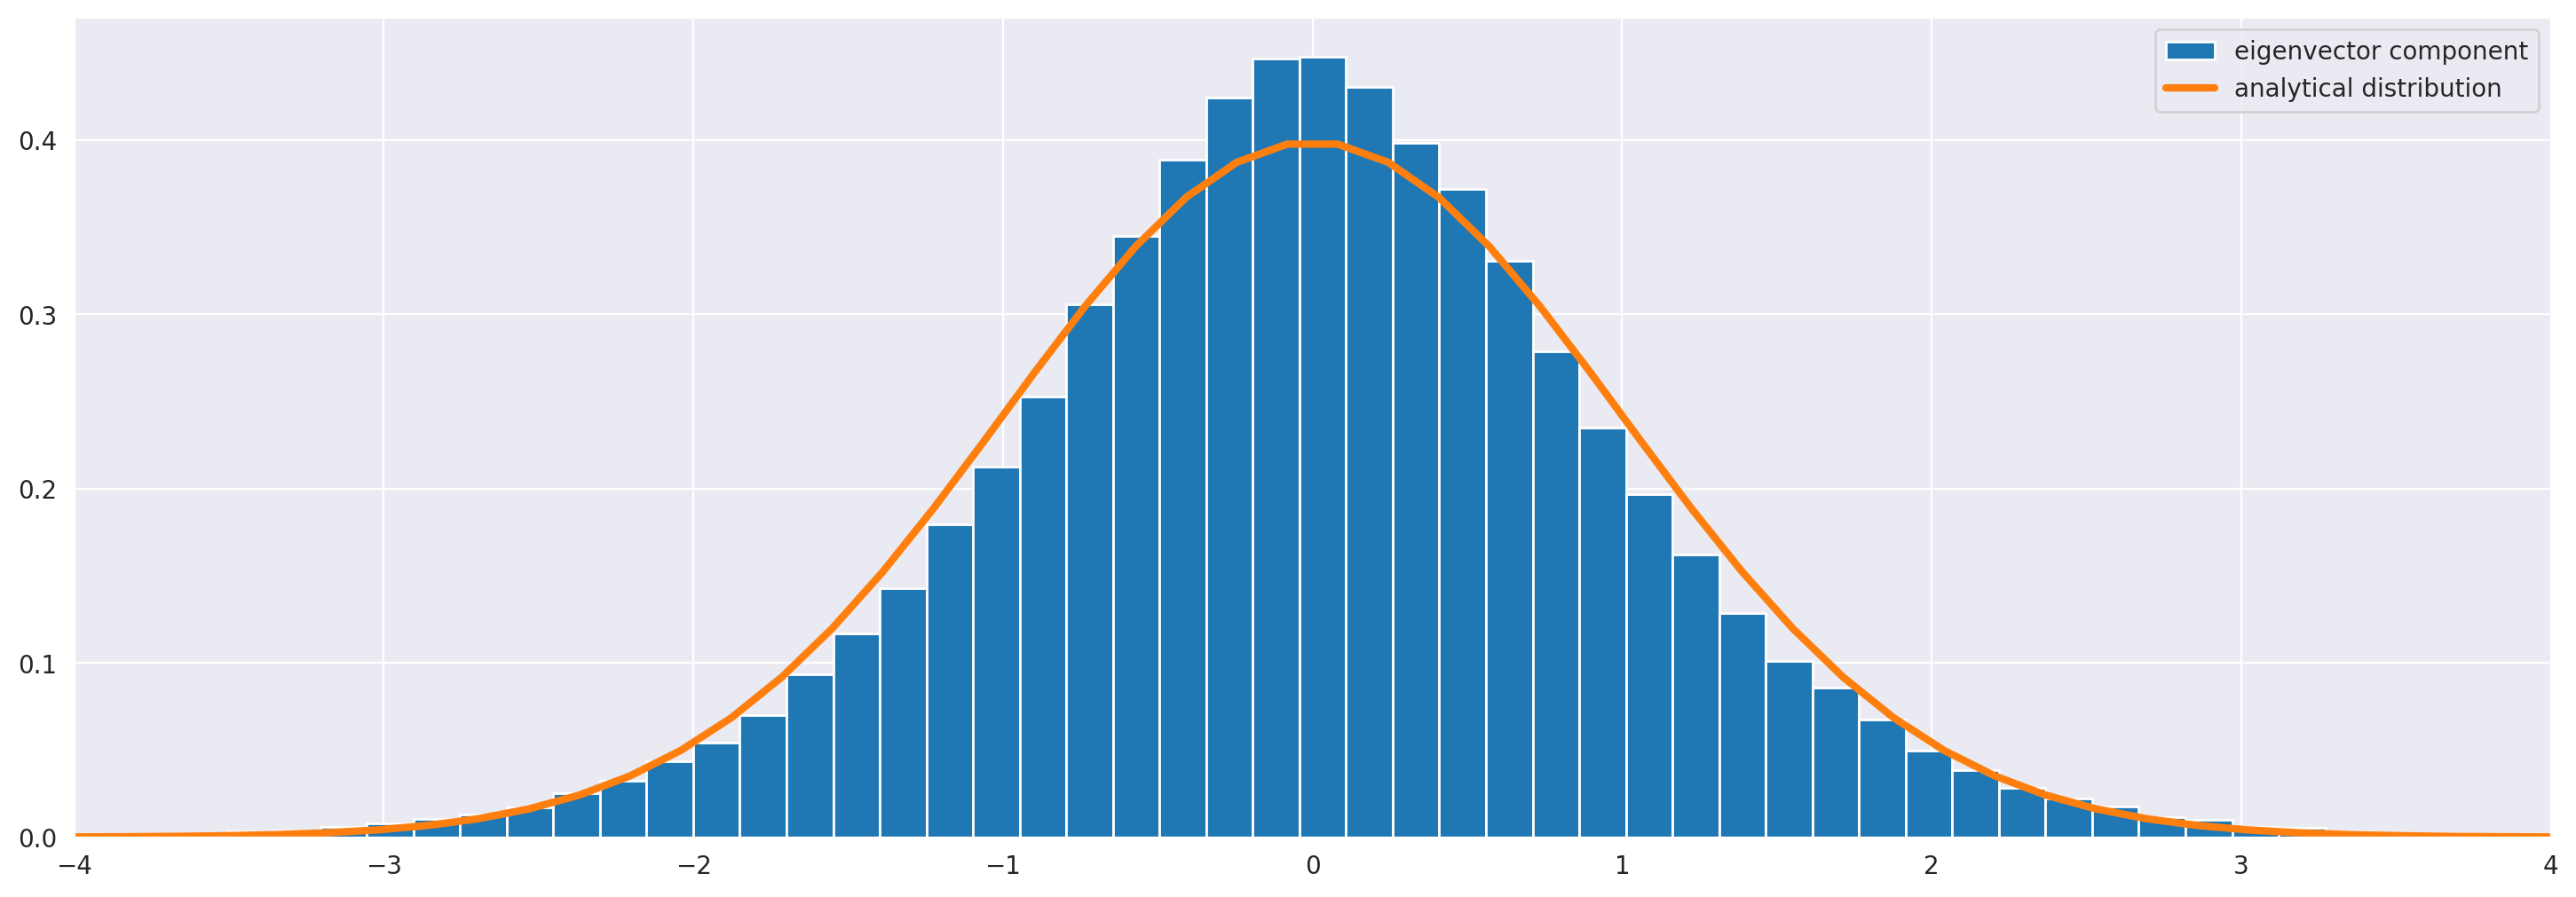

In [24]:
# all components from lambda- to lambda+
comp_rmt_ind = np.where((evalues>lambda_minus) & (evalues<lambda_plus))
comp_rmt = evectors[:,comp_rmt_ind].flatten() / np.sqrt(1/len(evalues))
ls = np.linspace(-4,4)
plt.figure(figsize=(18,6))
plt.hist(comp_rmt, density=True, bins=100, label='eigenvector component')
plt.plot(ls, 1/np.sqrt(2*np.pi) * np.exp(-ls**2/2), linewidth=3, label='analytical distribution')
plt.xlim(-4,4)
plt.legend()

# Returns of SPY vs Eigenportfolio

In [25]:
spy = yf.download('SPY', start='2018-01-01', end='2023-01-01')['Adj Close']
spy = spy.pct_change().dropna() # spy returns

epf1 = (evectors[:,-1]/evectors[:,-1].sum() * returns).sum(axis=1) # returns of eigenportfolio 1
epf1.index = pd.to_datetime(epf1.index) 
epf100 = (evectors[:,-100]/evectors[:,-100].sum() * returns).sum(axis=1) # returns of eigenportfolio 100
epf100.index = pd.to_datetime(epf100.index) 

# standardize returns
spy_std = (spy - spy.mean()) / spy.std()
epf1_std = (epf1 - epf1.mean()) / epf1.std()
epf100_std = (epf100 - epf100.mean()) / epf100.std()

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'SPY')

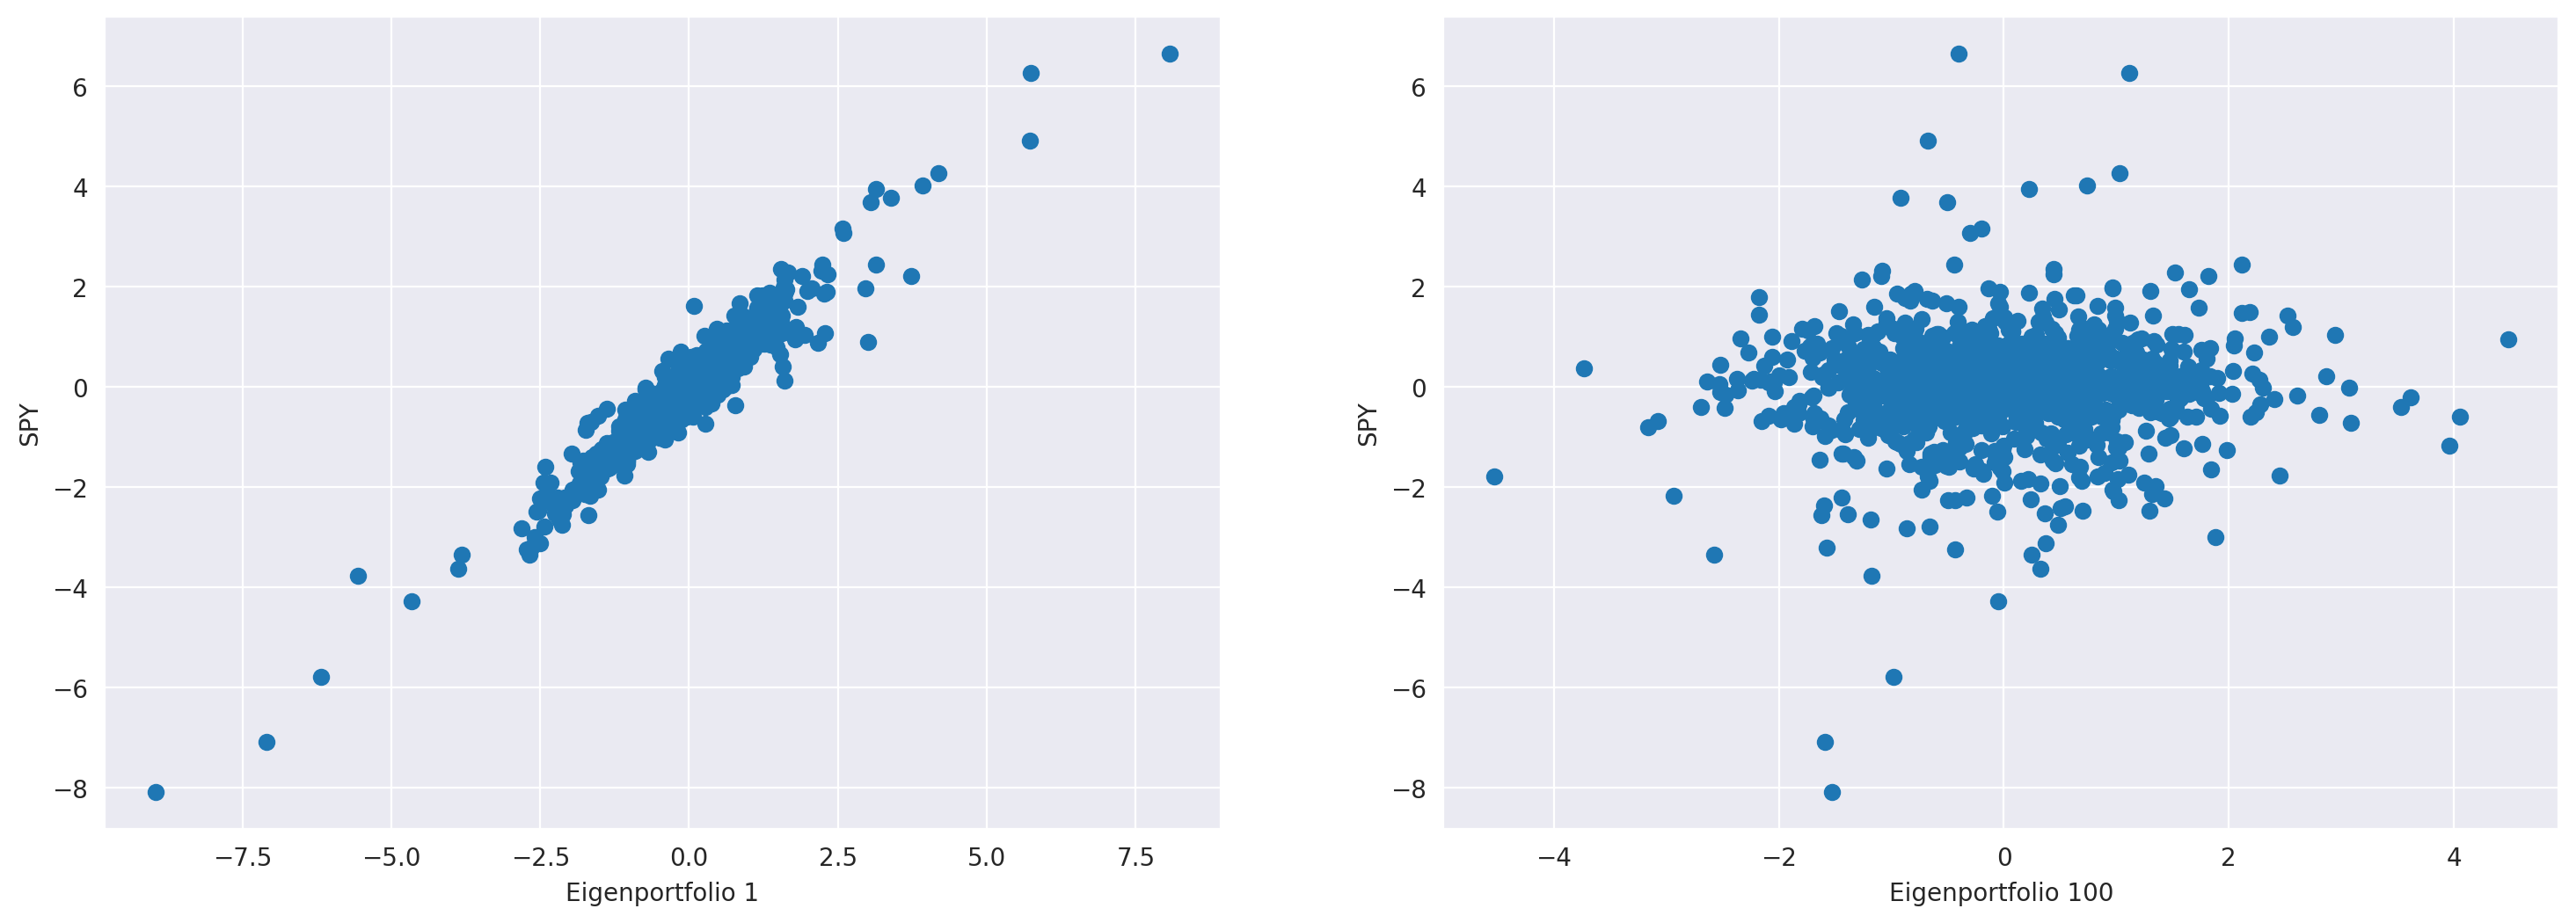

In [26]:
# plot
fig,axs = plt.subplots(1,2,figsize=(18,6))
axs[0].scatter(epf1_std, spy_std)
axs[0].set_xlabel('Eigenportfolio 1')
axs[0].set_ylabel('SPY')
axs[1].scatter(epf100_std, spy_std)
axs[1].set_xlabel('Eigenportfolio 100')
axs[1].set_ylabel('SPY')

In [27]:
np.corrcoef(epf1_std,spy_std)

array([[1.        , 0.95779919],
       [0.95779919, 1.        ]])

In [28]:
np.corrcoef(epf100_std,spy_std)

array([[1.        , 0.04903503],
       [0.04903503, 1.        ]])

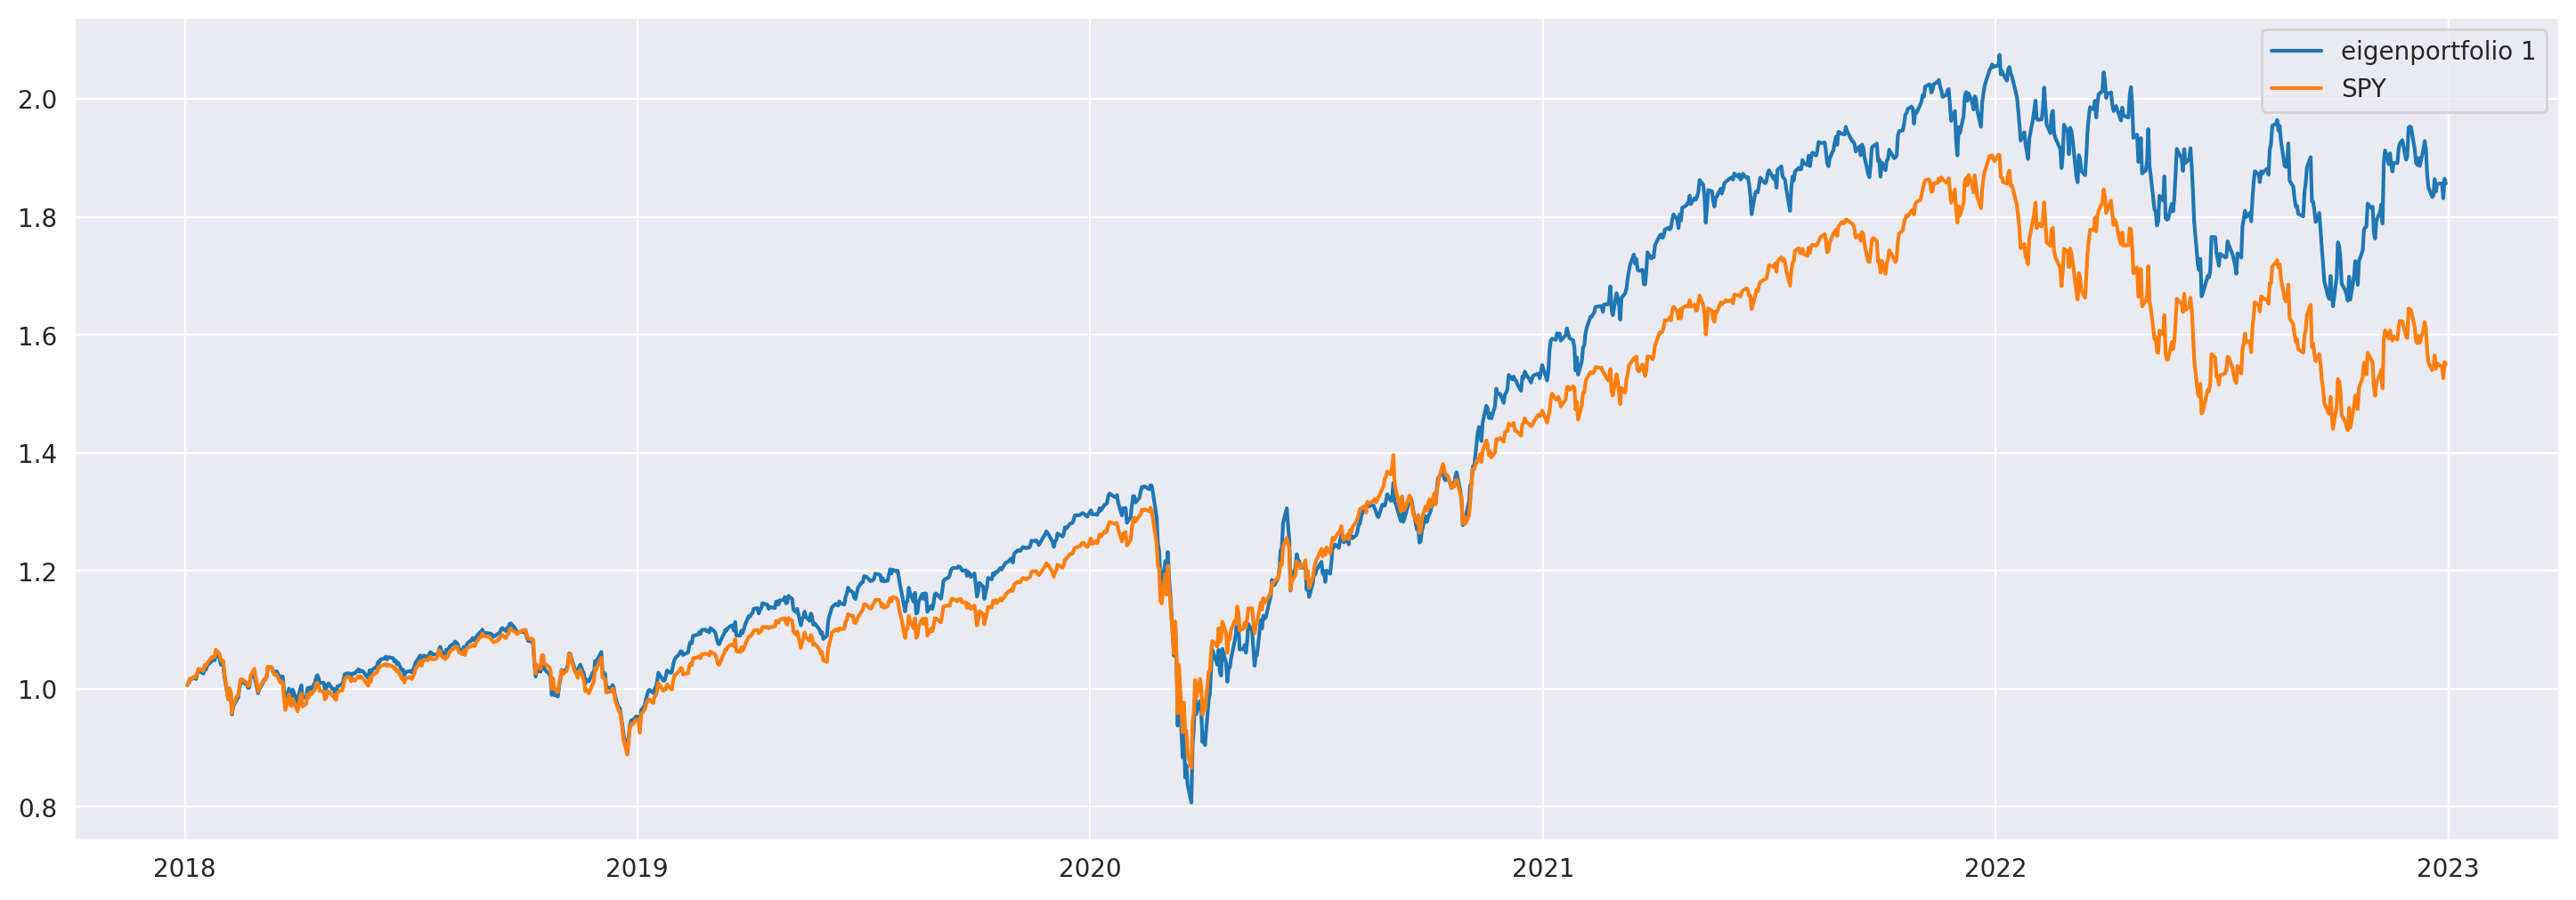

In [29]:
# cumulative returns of SPY and Eigenportfolio 1
plt.figure(figsize=(18,6))
plt.plot((1 + epf1).cumprod(), label='eigenportfolio 1')
plt.plot((1 + spy).cumprod(), label='SPY')
plt.legend()

# Inverse Participation Ratio

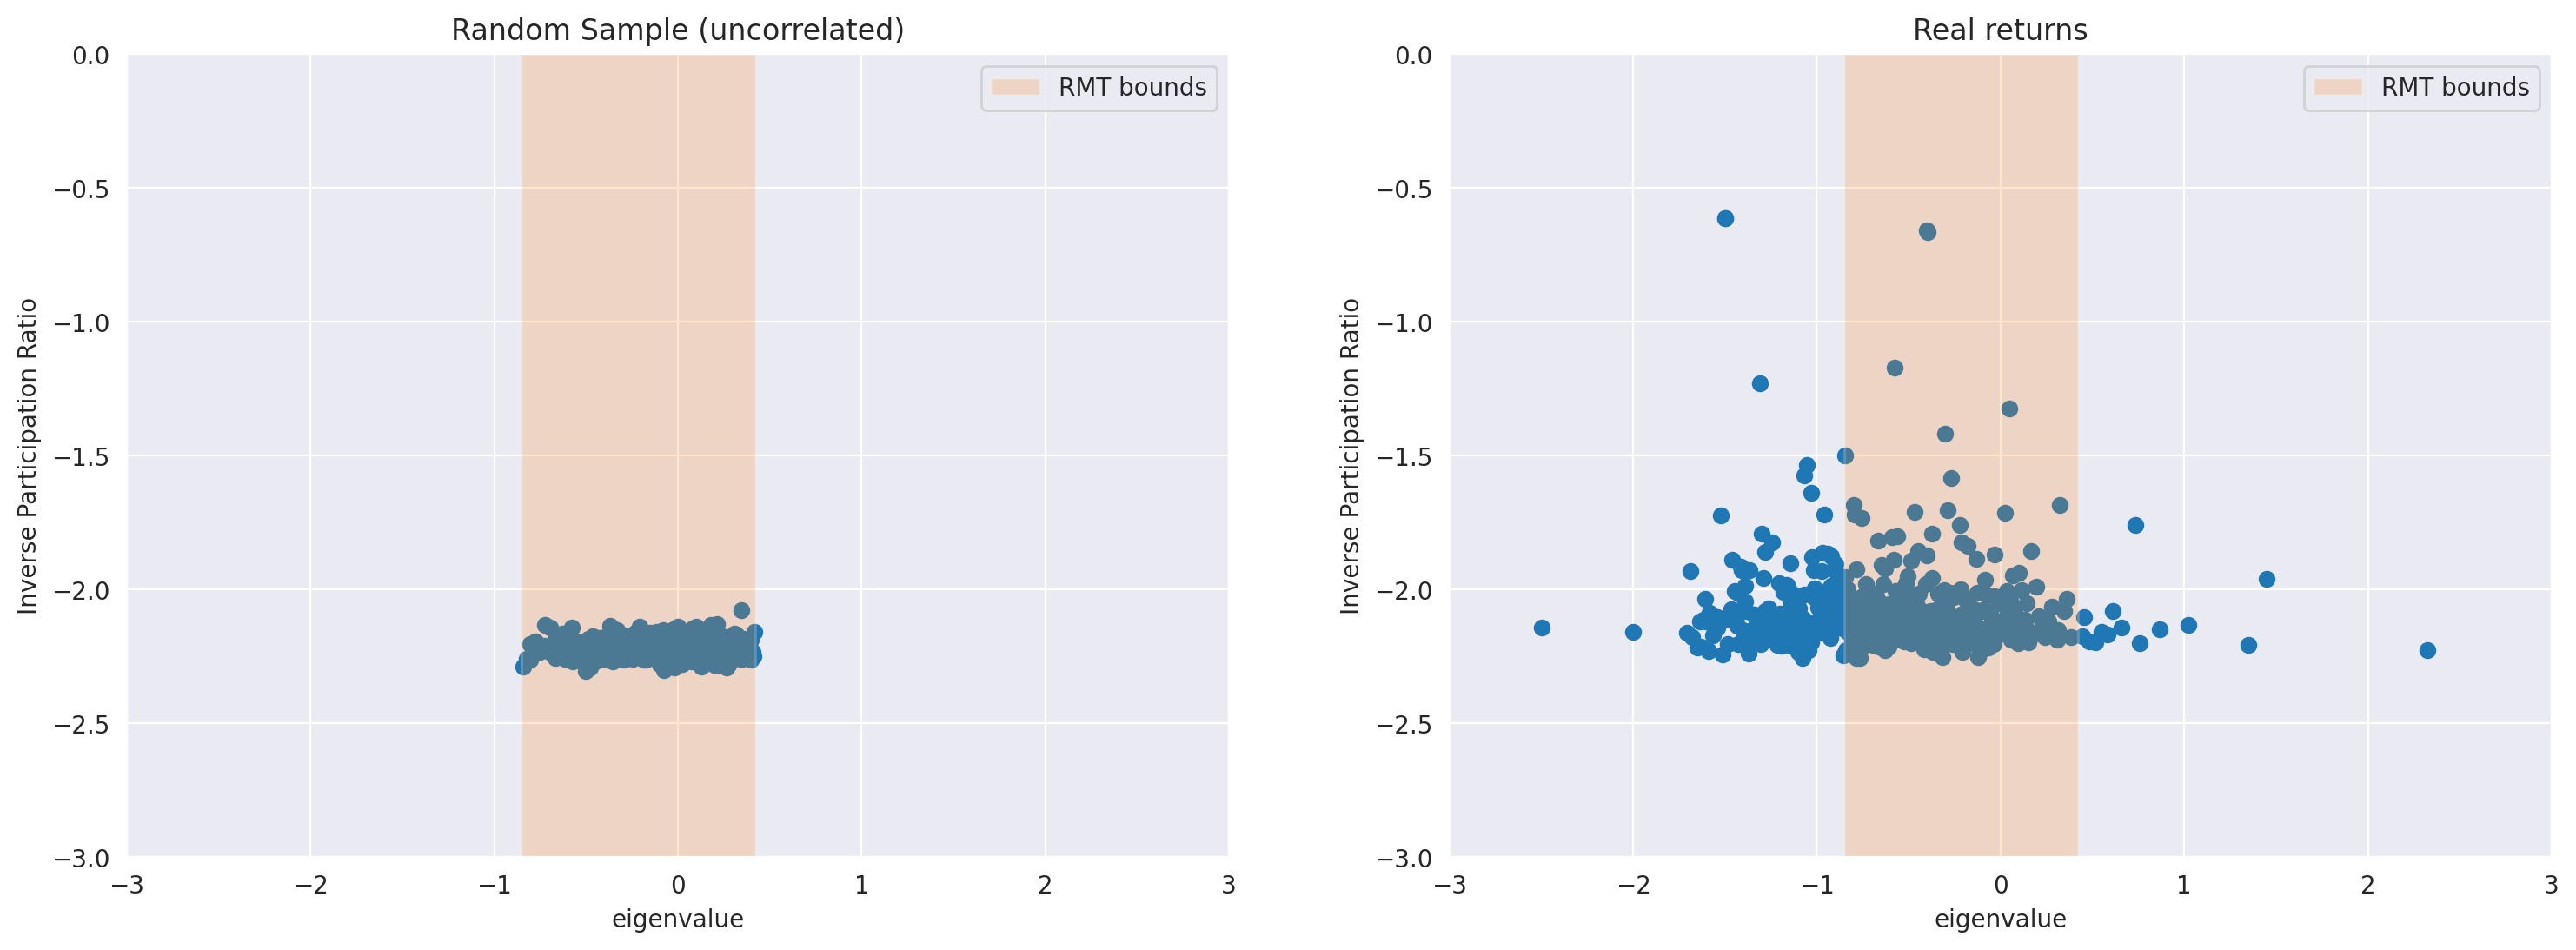

In [30]:
# random sample (uncorrelated)
rs = np.random.multivariate_normal(mean=returns.mean(), cov=np.diag(returns.var()), size=len(returns))
evals_rs,evecs_rs = np.linalg.eigh(np.corrcoef(rs.T))
ipr_rs = (evecs_rs**4).sum(axis=1)

# real returns
ipr = (evectors**4).sum(axis=1)

fig,axs = plt.subplots(1,2,figsize=(18,6))
axs[0].scatter(np.log10(evals_rs), np.log10(ipr_rs))
axs[0].fill_between([np.log10(lambda_minus), np.log10(lambda_plus)], -3, 0, alpha=0.2, label='RMT bounds')
axs[0].set_xlabel('eigenvalue')
axs[0].set_ylabel('Inverse Participation Ratio')
axs[0].set_xlim(-3,3)
axs[0].set_ylim(-3,0)
axs[0].set_title('Random Sample (uncorrelated)')
axs[0].legend()
axs[1].scatter(np.log10(evalues), np.log10(ipr))
axs[1].fill_between([np.log10(lambda_minus), np.log10(lambda_plus)], -3, 0, alpha=0.2, label='RMT bounds')
axs[1].set_xlabel('eigenvalue')
axs[1].set_ylabel('Inverse Participation Ratio')
axs[1].set_xlim(-3,3)
axs[1].set_ylim(-3,0)
axs[1].set_title('Real returns')
axs[1].legend()

# Plot efficient frontier (generated data)

In [31]:
# generate data
mean = returns.mean()
cov = returns.cov()

np.random.seed(1)
returns_sim = np.random.multivariate_normal(mean=mean, cov=cov, size=len(returns))
returns_sim = pd.DataFrame(returns_sim, index=returns.index, columns=returns.columns)

In [32]:
returns_train = returns_sim.loc['2018-01-01':'2021-12-31']
returns_test = returns_sim.loc['2022-01-01':'2022-12-31']

In [33]:
stocks = returns.columns

In [34]:
# find minimum variance portfolio
from scipy.optimize import minimize

# function to minimize
def volatility(weights, returns_covariance):
    return np.sqrt(weights.T @ returns_covariance @ weights * 252)

constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})

# initial guess
x0 = np.ones(len(stocks)) / len(stocks)

# bounds
bounds=[[0,1]]*len(stocks)

In [35]:
res = minimize(volatility, x0, args=(returns_train.cov()), 
               bounds=bounds, constraints=constraints)

In [36]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13630020000163393
       x: [ 0.000e+00  2.140e-16 ...  1.155e-18  0.000e+00]
     nit: 11
     jac: [ 1.602e-01  1.430e-01 ...  1.670e-01  1.725e-01]
    nfev: 5402
    njev: 11

In [37]:
# predicted volatility
res.fun

0.13630020000163393

In [38]:
# predicted return
res.x.T @ returns_train.mean() * 252

0.20050058898655593

In [39]:
# realized volatility
np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252)

0.1494112121742992

In [40]:
# realized return
res.x.T @ returns_test.mean() * 252

0.10707252765703236

In [41]:
def negative_annual_return(weights, returns_mean):
    ret = weights.T @ returns_mean * 252
    return -ret

In [42]:
rets_pred = []
rets_real = []
vols_real = []

target_vols = np.linspace(0.14, 0.5)

for vol in tqdm(target_vols):
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns_train.cov())-vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_train.mean()), 
               bounds=bounds, constraints=constraints)
    rets_pred.append(-res.fun)
    rets_real.append(res.x.T @ returns_test.mean() * 252) # realized return
    vols_real.append(np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252)) # realized volatility

100%|██████████| 50/50 [28:39<00:00, 34.39s/it] 


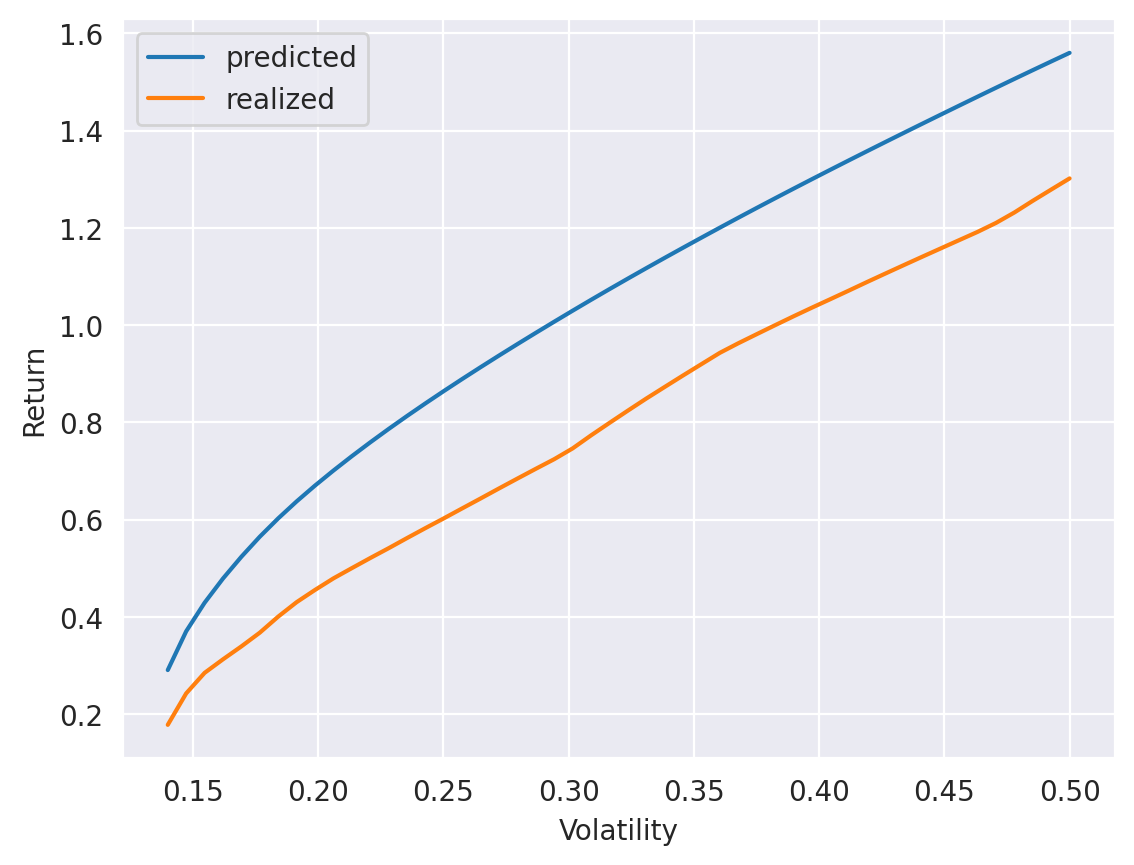

In [43]:
plt.plot(target_vols, rets_pred, label='predicted')
plt.plot(target_vols, rets_real, label='realized')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()

## Repeat with filtered correlation matrix

In [44]:
# find upper bound for eigenvalues
Q = len(returns_train) / len(returns_train.columns)
Q

2.0551020408163265

In [45]:
# lambda+
lambda_plus = 1 + 1/Q + 2*np.sqrt(1/Q)
lambda_plus

2.8817194189491913

In [46]:
# lambda-
lambda_minus = 1 + 1/Q - 2*np.sqrt(1/Q)
lambda_minus

0.09146826724743273

In [47]:
corr = returns_train.corr()

In [48]:
# eigenvalue decomposition
evalues,evectors = np.linalg.eigh(corr.values)

In [49]:
len(evalues[evalues>lambda_plus])

14

In [50]:
len(evalues[evalues<lambda_minus])

174

In [51]:
evalues[evalues>lambda_plus]

array([  2.98867226,   3.24028475,   3.32175431,   3.79851837,
         4.09482618,   4.30481342,   4.81747608,   5.5322293 ,
         5.93203794,   7.58481605,  10.3664301 ,  23.46578739,
        26.99752738, 213.77891462])

In [52]:
# filtered correlation matrix
evalues[evalues<=lambda_plus] = 0
corr_filt = pd.DataFrame(evectors @ np.diag(evalues) @ evectors.T, index=corr.index, columns=corr.columns)
np.fill_diagonal(corr_filt.values, 1)

In [53]:
# transform correlation matrix to covariance matrix
D = np.diag(returns_train.std())
cov_filt = D @ corr_filt @ D

In [54]:
# minimum variance portfolio

constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})

# initial guess
x0 = np.ones(len(stocks)) / len(stocks)

# bounds
bounds=[[0,1]]*len(stocks)

res = minimize(volatility, x0, args=(cov_filt), 
               bounds=bounds, constraints=constraints)

In [55]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13647798988923743
       x: [ 2.954e-16  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 10
     jac: [ 1.609e-01  1.437e-01 ...  1.537e-01  1.726e-01]
    nfev: 4911
    njev: 10

In [56]:
# predicted volatility
res.fun

0.13647798988923743

In [57]:
# predicted return
res.x.T @ returns_train.mean() * 252

0.20569165618732035

In [58]:
# realized volatility
np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252)

0.14972176422857977

In [59]:
# realized return
res.x.T @ returns_test.mean() * 252

0.11694946872170779

In [60]:
target_vols = np.linspace(0.14, 0.5)
rets_pred_filt = []
rets_real_filt = []
vols_real_filt = []

for vol in tqdm(target_vols):
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,cov_filt)-vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_train.mean()), 
               bounds=bounds, constraints=constraints)
    rets_pred_filt.append(-res.fun)
    rets_real_filt.append(res.x.T @ returns_test.mean() * 252)
    vols_real_filt.append(np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252))

100%|██████████| 50/50 [05:51<00:00,  7.03s/it]


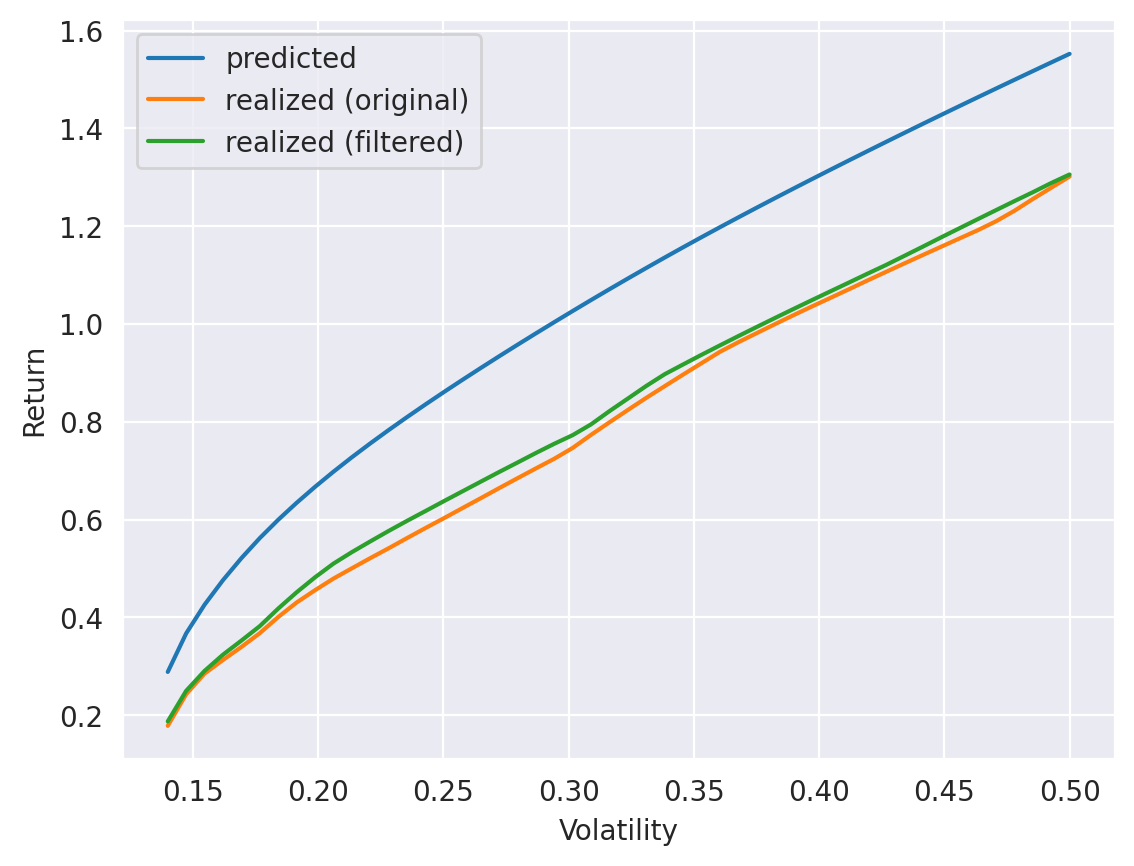

In [61]:
plt.plot(target_vols, rets_pred_filt, label='predicted')
plt.plot(target_vols, rets_real, label='realized (original)')
plt.plot(target_vols, rets_real_filt, label='realized (filtered)')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()

In [62]:
(np.array(vols_real)**2 / target_vols**2).mean()

1.037760945645475

In [63]:
(np.array(vols_real_filt)**2 / target_vols**2).mean()

1.0253035972873688

# Real data

In [64]:
returns_train = returns.loc['2018-01-01':'2021-12-31']
returns_test = returns.loc['2022-01-01':'2022-12-31']

In [65]:
# find minimum variance portfolio
constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})

# initial guess
x0 = np.ones(len(stocks)) / len(stocks)

# bounds
bounds=[[0,1]]*len(stocks)

In [66]:
res = minimize(volatility, x0, args=(returns_train.cov()), 
               bounds=bounds, constraints=constraints)

In [67]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13597766397216016
       x: [ 3.351e-16  0.000e+00 ...  0.000e+00  1.302e-17]
     nit: 12
     jac: [ 1.565e-01  1.385e-01 ...  1.545e-01  1.669e-01]
    nfev: 5892
    njev: 12

In [68]:
# predicted volatility
res.fun

0.13597766397216016

In [69]:
# predicted return
res.x.T @ returns_train.mean() * 252

0.16474614453022574

In [70]:
# realized volatility
np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252)

0.1635742907942228

In [71]:
# realized return
res.x.T @ returns_test.mean() * 252

-0.08676661116514248

In [72]:
target_vols = np.linspace(0.14, 0.5)
rets_pred = []
rets_real = []
vols_real = []

for vol in tqdm(target_vols):
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns_train.cov())-vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_train.mean()), 
               bounds=bounds, constraints=constraints)
    rets_pred.append(-res.fun)
    rets_real.append(res.x.T @ returns_test.mean() * 252)
    vols_real.append(np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252))

100%|██████████| 50/50 [28:46<00:00, 34.54s/it] 


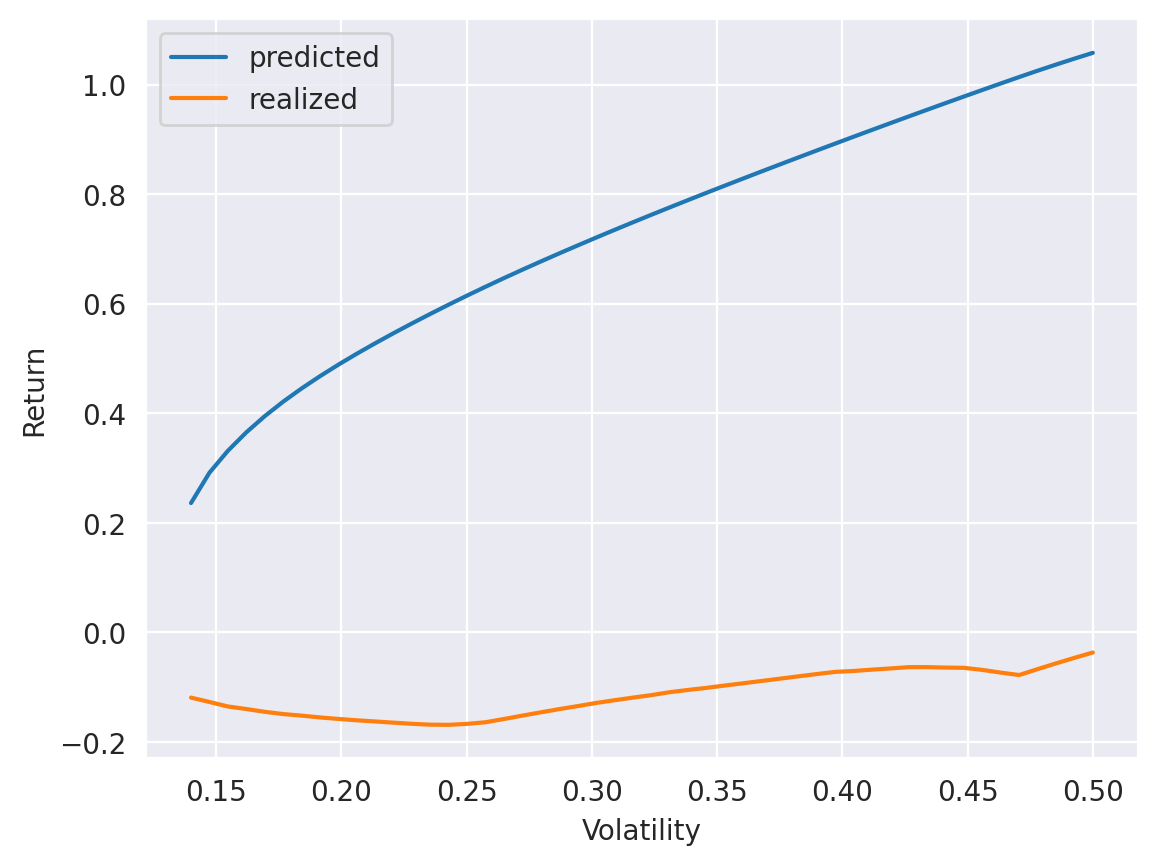

In [73]:
plt.plot(target_vols, rets_pred, label='predicted')
plt.plot(target_vols, rets_real, label='realized')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()

## Repeat with modified correlation matrix

In [74]:
# find upper bound for eigenvalues
Q = len(returns_train) / len(returns_train.columns)
Q

2.0551020408163265

In [75]:
# lambda+
lambda_plus = 1 + 1/Q + 2*np.sqrt(1/Q)
lambda_plus

2.8817194189491913

In [76]:
# lambda-
lambda_minus = 1 + 1/Q - 2*np.sqrt(1/Q)
lambda_minus

0.09146826724743273

In [77]:
corr = returns_train.corr()

In [78]:
# eigenvalue decomposition
evalues,evectors = np.linalg.eigh(corr.values)

In [79]:
len(evalues[evalues>lambda_plus])

13

In [80]:
len(evalues[evalues<lambda_minus])

137

In [81]:
evalues[evalues<=lambda_plus] = 0

In [82]:
# filtered correlation matrix
corr_filt = pd.DataFrame(evectors @ np.diag(evalues) @ evectors.T, index=corr.index, columns=corr.columns)
np.fill_diagonal(corr_filt.values, 1)

In [83]:
# transform correlation matrix to covariance matrix
D = np.diag(returns_train.std())
cov_mod = D @ corr_filt @ D

In [84]:
# find minimum variance portfolio
constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})

# initial guess
x0 = np.ones(len(stocks)) / len(stocks)

# bounds
bounds=[[0,1]]*len(stocks)

In [85]:
res = minimize(volatility, x0, args=(cov_filt), 
               bounds=bounds, constraints=constraints)

In [86]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13647798988923743
       x: [ 2.954e-16  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 10
     jac: [ 1.609e-01  1.437e-01 ...  1.537e-01  1.726e-01]
    nfev: 4911
    njev: 10

In [87]:
# predicted volatility
res.fun

0.13647798988923743

In [88]:
# predicted return
res.x.T @ returns_train.mean() * 252

0.1496249772780441

In [89]:
# realized volatility
np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252)

0.15458719266535115

In [90]:
# realized return
res.x.T @ returns_test.mean() * 252

-0.07860136707966116

In [91]:
target_vols = np.linspace(0.14, 0.5)
rets_pred_filt = []
rets_real_filt = []
vols_real_filt = []

for vol in tqdm(target_vols):
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,cov_filt)-vol}, 
               {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_train.mean()), 
               bounds=bounds, constraints=constraints)
    rets_pred_filt.append(-res.fun)
    rets_real_filt.append(res.x.T @ returns_test.mean() * 252)
    vols_real_filt.append(np.sqrt(res.x.T @ returns_test.cov() @ res.x * 252))

100%|██████████| 50/50 [05:37<00:00,  6.75s/it]


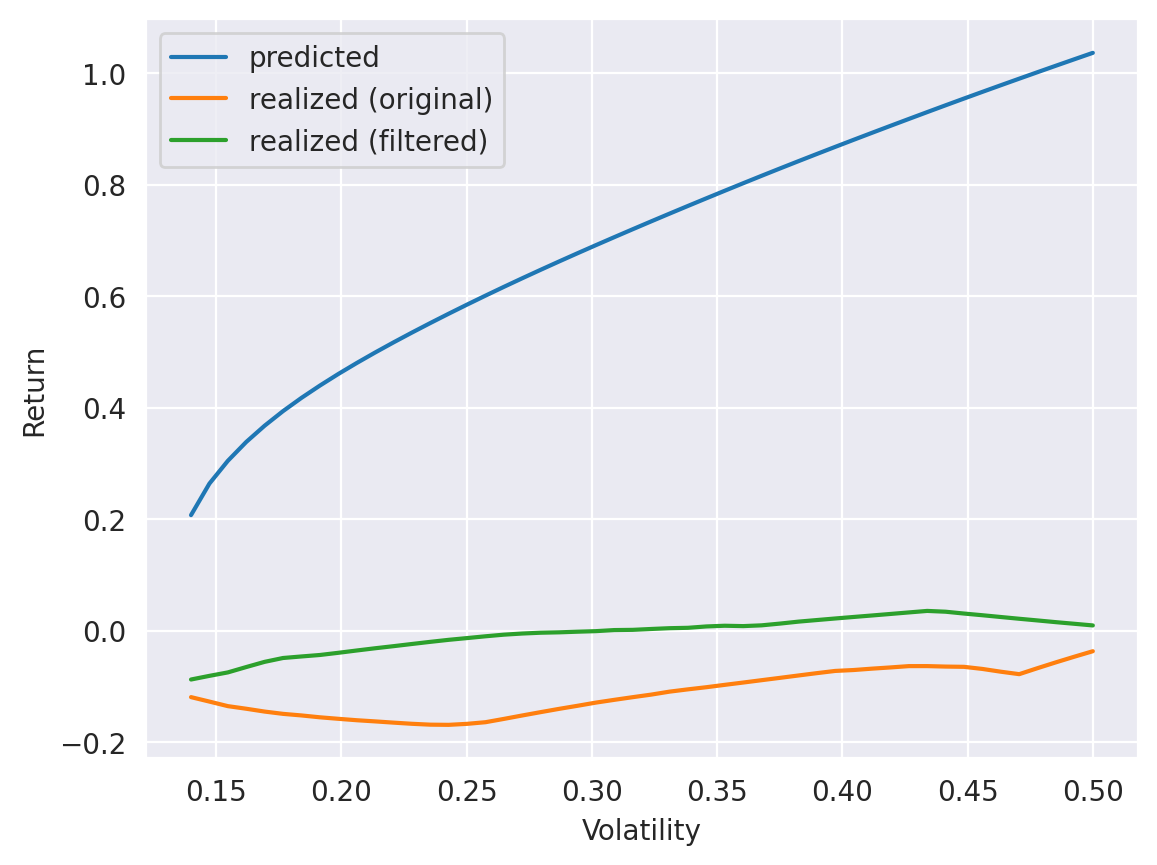

In [92]:
plt.plot(target_vols, rets_pred_filt, label='predicted')
plt.plot(target_vols, rets_real, label='realized (original)')
plt.plot(target_vols, rets_real_filt, label='realized (filtered)')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()

In [93]:
(np.array(vols_real)**2 / target_vols**2).mean()

1.5674669157596963

In [94]:
(np.array(vols_real_filt)**2 / target_vols**2).mean()

1.2531580851378572

# Strategy

In [95]:
# prepare weekly data
prices.index = pd.to_datetime(prices.index)
prices_w = prices.resample('1W').last()
returns_w = prices_w.pct_change().dropna()

In [96]:
# equally weighted portfolio
cumret_eqw = (1 + returns_w.loc['2019-01-01':].sum(axis=1)/returns.shape[1]).cumprod()

In [97]:
results_df = pd.DataFrame(columns = ['Total return', 'APR', 'Sharpe', 'MaxDD', 'MaxDDD'])
results_df.loc['Equally Weighted'] = calculate_metrics(cumret_eqw)
results_df

,Total return,APR,Sharpe,MaxDD,MaxDDD
Equally Weighted,0.933575,0.178278,0.799373,-0.367922,52.0


In [98]:
volatility_eqw = cumret_eqw.pct_change().std()*np.sqrt(52)
volatility_eqw

0.24383101683286204

In [99]:
# MPT with simple (rolling) covariance
positions = pd.DataFrame(index=returns_w.loc['2019-01-01':].index, columns=returns_w.columns)

target_vol = volatility_eqw
bounds=[[0,1]]*len(stocks)
x0 = np.ones(len(stocks)) / len(stocks)

for t in tqdm(returns_w.loc['2019-01-01':].index):
    # prepare data
    prices_tmp = prices.loc[:t].iloc[-252:]
    returns_tmp = prices_tmp.pct_change().dropna()
    
    # perform optimization
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,returns_tmp.cov())-target_vol}, 
                   {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_tmp.mean()), 
               bounds=bounds, constraints=constraints)
    if res.status!=0:
        print('Optimization failed')
        positions.loc[t] = positions.loc[:t].iloc[-2] # keep previous weights
    else:
        positions.loc[t] = res.x

100%|██████████| 209/209 [1:11:38<00:00, 20.56s/it]


In [100]:
cumret_simple_cov = (1 + (positions.shift() * returns_w.loc['2019-01-01':]).sum(axis=1)).cumprod()
results_df.loc['MPT (simple cov)'] = calculate_metrics(cumret_simple_cov)

In [101]:
results_df

,Total return,APR,Sharpe,MaxDD,MaxDDD
Equally Weighted,0.933575,0.178278,0.799373,-0.367922,52.0
MPT (simple cov),1.139334,0.208299,0.781858,-0.377312,59.0


In [102]:
cumret_simple_cov.pct_change().std()*np.sqrt(52)

0.30449046923080436

In [103]:
# strategy with filtered covariance matrix
positions = pd.DataFrame(index=returns_w.loc['2019-01-01':].index, columns=returns_w.columns)

target_vol = volatility_eqw
bounds=[[0,1]]*len(stocks)
x0 = np.ones(len(stocks)) / len(stocks)

for t in tqdm(returns_w.loc['2019-01-01':].index):
    # prepare data
    prices_tmp = prices.loc[:t].iloc[-252:]
    returns_tmp = prices_tmp.pct_change().dropna()
    
    # find upper bound for eigenvalues
    Q = returns_tmp.shape[0] / returns_tmp.shape[1]
    lambda_plus = 1 + 1/Q + 2*np.sqrt(1/Q)
    
    # perform eigenvalue decomposition
    corr = returns_tmp.corr()
    evalues,evectors = np.linalg.eigh(corr)
    
    # construct filtered correlation matrix
    evalues[evalues<=lambda_plus] = 0
    corr_filt = pd.DataFrame(evectors @ np.diag(evalues) @ evectors.T, index=corr.index, columns=corr.columns)
    np.fill_diagonal(corr_filt.values, 1)
    
    # transform correlation matrix to covariance matrix
    D = np.diag(returns_tmp.std())
    cov_filt = D @ corr_filt @ D
    
    # perform optimization using filtered covariance matrix
    constraints = ({'type':'eq', 'fun': lambda x: volatility(x,cov_filt)-target_vol}, 
                   {'type':'eq', 'fun': lambda x: np.sum(x)-1})
    res = minimize(negative_annual_return, x0, args=(returns_tmp.mean()), 
               bounds=bounds, constraints=constraints)
    if res.status!=0:
        print('Optimization failed')
        positions.loc[t] = positions.loc[:t].iloc[-2] # keep previous weights
    else:
        positions.loc[t] = res.x

100%|██████████| 209/209 [27:52<00:00,  8.00s/it]


In [104]:
cumret_filtered_cov = (1 + (positions.shift() * returns_w.loc['2019-01-01':]).sum(axis=1)).cumprod()
results_df.loc['MPT (filtered cov)'] = calculate_metrics(cumret_filtered_cov)

In [105]:
results_df

,Total return,APR,Sharpe,MaxDD,MaxDDD
Equally Weighted,0.933575,0.178278,0.799373,-0.367922,52.0
MPT (simple cov),1.139334,0.208299,0.781858,-0.377312,59.0
MPT (filtered cov),1.170707,0.212684,0.769937,-0.385369,40.0


In [106]:
cumret_filtered_cov.pct_change().std()*np.sqrt(52)

0.32115993906601653